In [1]:
import os
import itertools
from PIL import Image

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Generate data paths with labels
train_data_dir = 'C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/Brain Tumor MRI Dataset/Training'
# print(train_data_dir)
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
print(folds)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    if os.path.isdir(foldpath):  # Check if it's a directory
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

train_df = pd.concat([Fseries, Lseries], axis= 1)
train_df

['.DS_Store', 'glioma', 'meningioma', 'notumor', 'pituitary']


,filepaths,labels
0,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,glioma
1,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,glioma
2,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,glioma
3,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,glioma
4,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,glioma
...,...,...
5707,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,pituitary
5708,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,pituitary
5709,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,pituitary
5710,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,pituitary


In [3]:
# Generate data paths with labels
test_data_dir = 'C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/Brain Tumor MRI Dataset/Testing'
filepaths = []
labels = []

folds = os.listdir(test_data_dir)
for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis= 1)
test_df.head(10)


,filepaths,labels
0,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,glioma
1,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,glioma
2,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,glioma
3,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,glioma
4,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,glioma
5,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,glioma
6,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,glioma
7,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,glioma
8,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,glioma
9,C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...,glioma


In [4]:
train_df, valid_df = train_test_split(train_df,  train_size= 0.8, shuffle= True, random_state=69)
print(train_df.head())
print(valid_df.head())
print(test_df.head())

                                              filepaths     labels
5516  C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...  pituitary
5187  C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...  pituitary
102   C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...     glioma
4754  C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...  pituitary
1100  C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...     glioma
                                              filepaths     labels
5407  C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...  pituitary
5370  C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...  pituitary
859   C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...     glioma
4144  C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...    notumor
3427  C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...    notumor
                                           filepaths  labels
0  C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...  glioma
1  C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/B...  glioma
2  C:/Users/H

In [5]:
# crobed image size
batch_size = 16
img_size = (224, 224)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 4569 validated image filenames belonging to 4 classes.
Found 1143 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


# Visualizing and Analyzing the dataset

Frequency Distributoin of Samples

In [6]:
import pandas as pd

# Assuming train_df, valid_df, and test_df are your dataframes

# Concatenate the dataframes to create a combined dataframe
combined_df = pd.concat([train_df, valid_df, test_df], ignore_index=True)

# Count the frequency of each label
label_counts = combined_df['labels'].value_counts()

# Print the frequency distribution
print("Frequency Distribution of Samples:")
print(label_counts)

Frequency Distribution of Samples:
notumor       2000
pituitary     1757
meningioma    1645
glioma        1621
Name: labels, dtype: int64


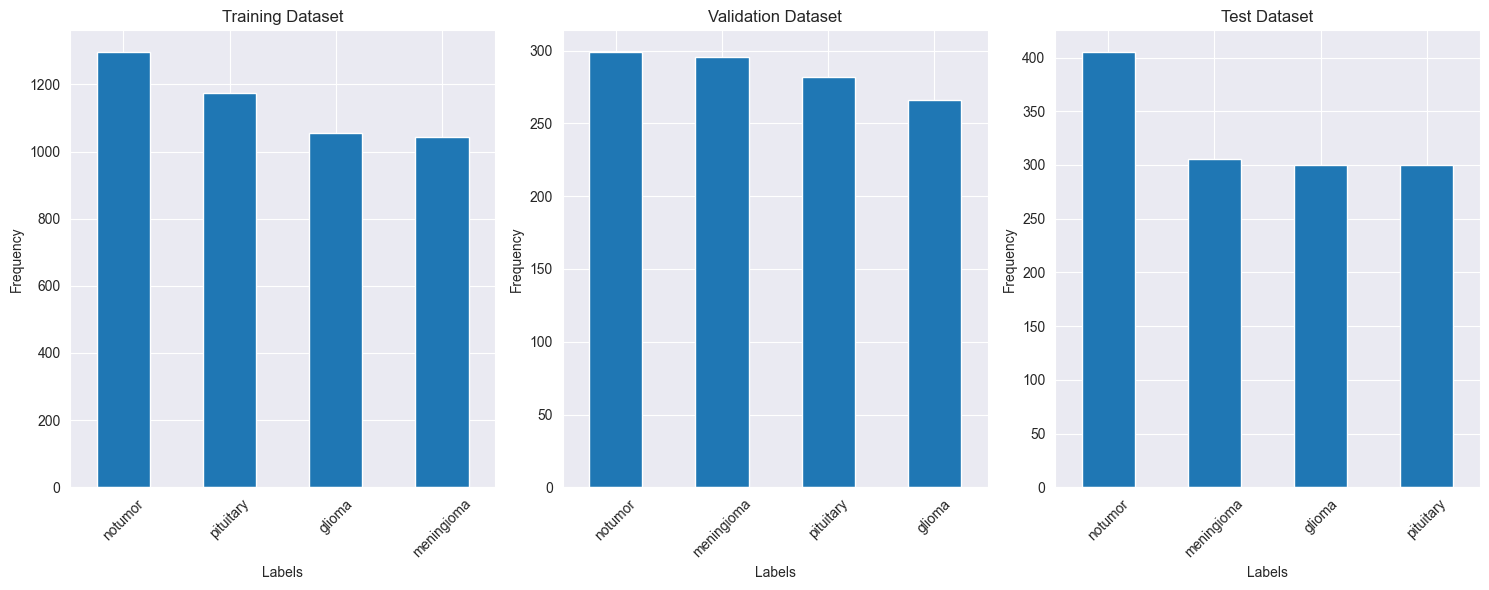

In [7]:
import matplotlib.pyplot as plt

# Calculate frequency distribution for each dataset
train_label_counts = train_df['labels'].value_counts()
valid_label_counts = valid_df['labels'].value_counts()
test_label_counts = test_df['labels'].value_counts()

# Plot frequency distribution for each dataset
plt.figure(figsize=(15, 6))

# Training dataset
plt.subplot(1, 3, 1)
train_label_counts.plot(kind='bar')
plt.title('Training Dataset')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Validation dataset
plt.subplot(1, 3, 2)
valid_label_counts.plot(kind='bar')
plt.title('Validation Dataset')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Test dataset
plt.subplot(1, 3, 3)
test_label_counts.plot(kind='bar')
plt.title('Test Dataset')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Explore the data 🔎

## 📡 visualizing some Random Samples

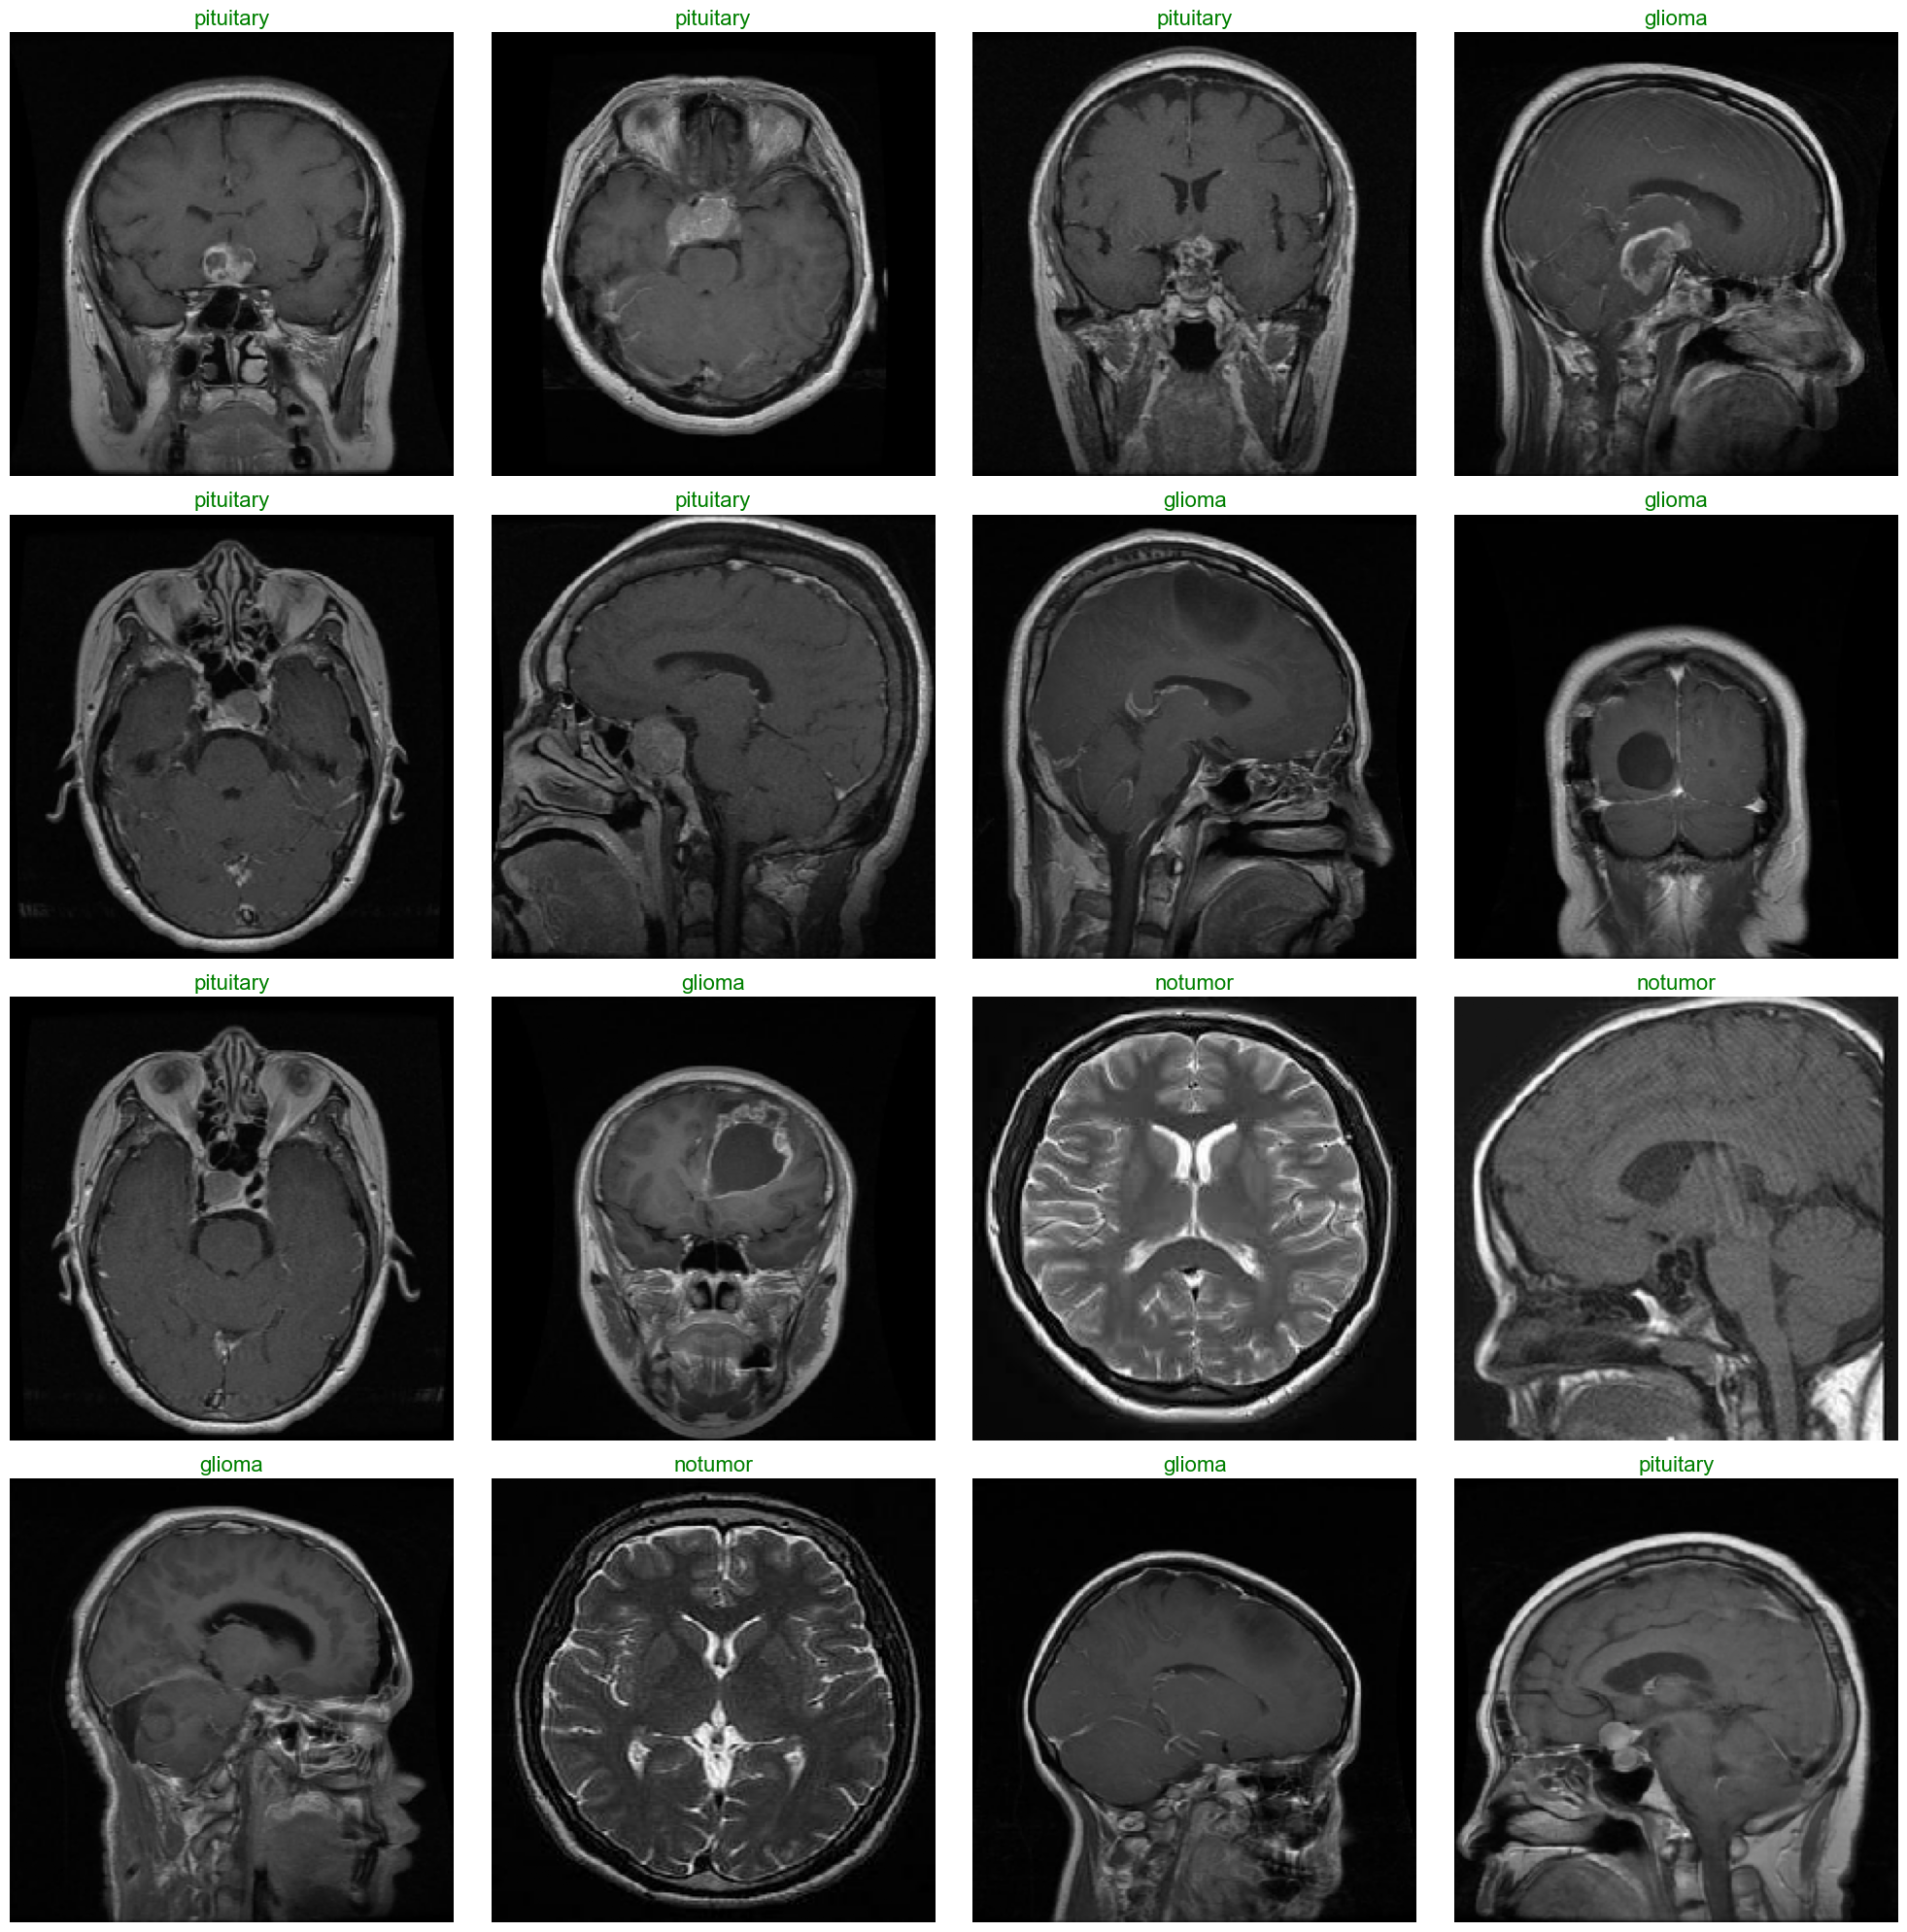

In [8]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'green', fontsize=16)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adamax

# Assuming train_gen is defined elsewhere and available here
class_count = len(list(train_gen.class_indices.keys()))  # to define the number of classes in the dense layer

img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape=img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(256, activation="relu"),
    Dense(64, activation="relu"),
    Dense(class_count, activation="softmax")
])

optimizer = Adamax()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [10]:
epochs = 10 # number of all epochs in training
optimizer.learning_rate.assign(0.0001)
history = model.fit(train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/10
286/286 [==============================] - 64s 201ms/step - loss: 0.8543 - accuracy: 0.6135 - val_loss: 0.5553 - val_accuracy: 0.7848
Epoch 2/10
286/286 [==============================] - 56s 197ms/step - loss: 0.5128 - accuracy: 0.7956 - val_loss: 0.5230 - val_accuracy: 0.7795
Epoch 3/10
286/286 [==============================] - 58s 204ms/step - loss: 0.3801 - accuracy: 0.8540 - val_loss: 0.5102 - val_accuracy: 0.7909
Epoch 4/10
286/286 [==============================] - 60s 209ms/step - loss: 0.2959 - accuracy: 0.8914 - val_loss: 0.4550 - val_accuracy: 0.8128
Epoch 5/10
286/286 [==============================] - 61s 213ms/step - loss: 0.2229 - accuracy: 0.9186 - val_loss: 0.2572 - val_accuracy: 0.9134
Epoch 6/10
286/286 [==============================] - 61s 212ms/step - loss: 0.1511 - accuracy: 0.9459 - val_loss: 0.2422 - val_accuracy: 0.9143
Epoch 7/10
286/286 [==============================] - 61s 212ms/step - loss: 0.1001 - accuracy: 0.9645 - val_loss: 0.2982 - val_ac

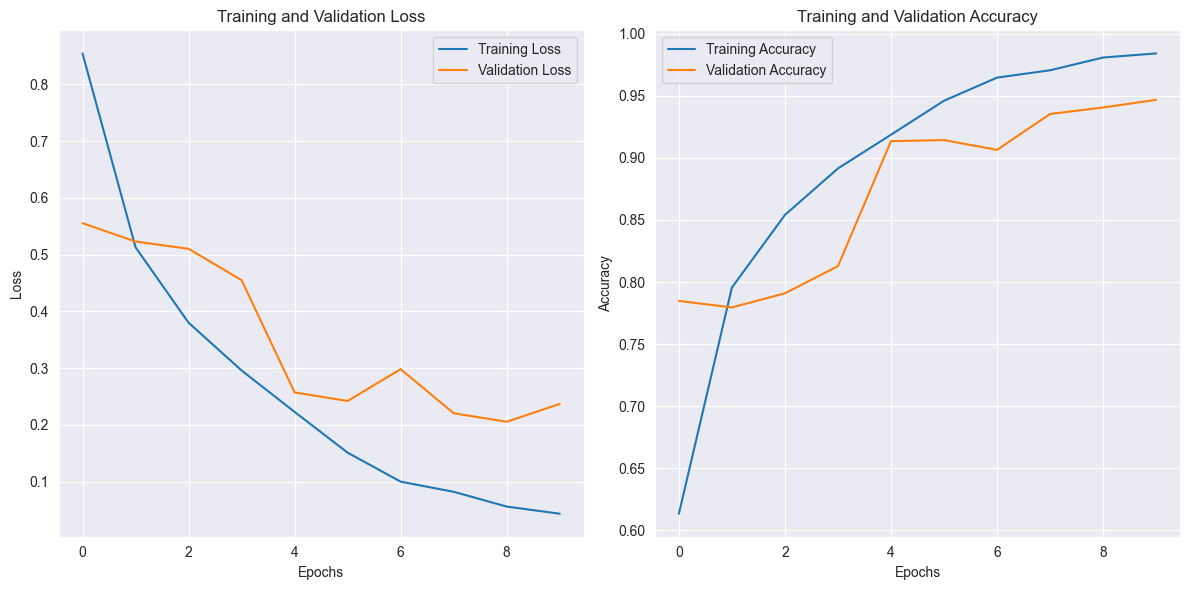

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot training history
def plot_training_history(history):
    # Plot training and validation loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Plot training history
plot_training_history(history)

In [12]:
epochs = 5 # number of all epochs in training
optimizer.learning_rate.assign(0.00001)
history = model.fit(train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/5
286/286 [==============================] - 55s 191ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.2408 - val_accuracy: 0.9493
Epoch 2/5
286/286 [==============================] - 59s 205ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.2574 - val_accuracy: 0.9519
Epoch 3/5
286/286 [==============================] - 62s 216ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2720 - val_accuracy: 0.9493
Epoch 4/5
286/286 [==============================] - 63s 220ms/step - loss: 7.0710e-04 - accuracy: 1.0000 - val_loss: 0.2868 - val_accuracy: 0.9501
Epoch 5/5
286/286 [==============================] - 64s 225ms/step - loss: 4.6236e-04 - accuracy: 1.0000 - val_loss: 0.3020 - val_accuracy: 0.9493


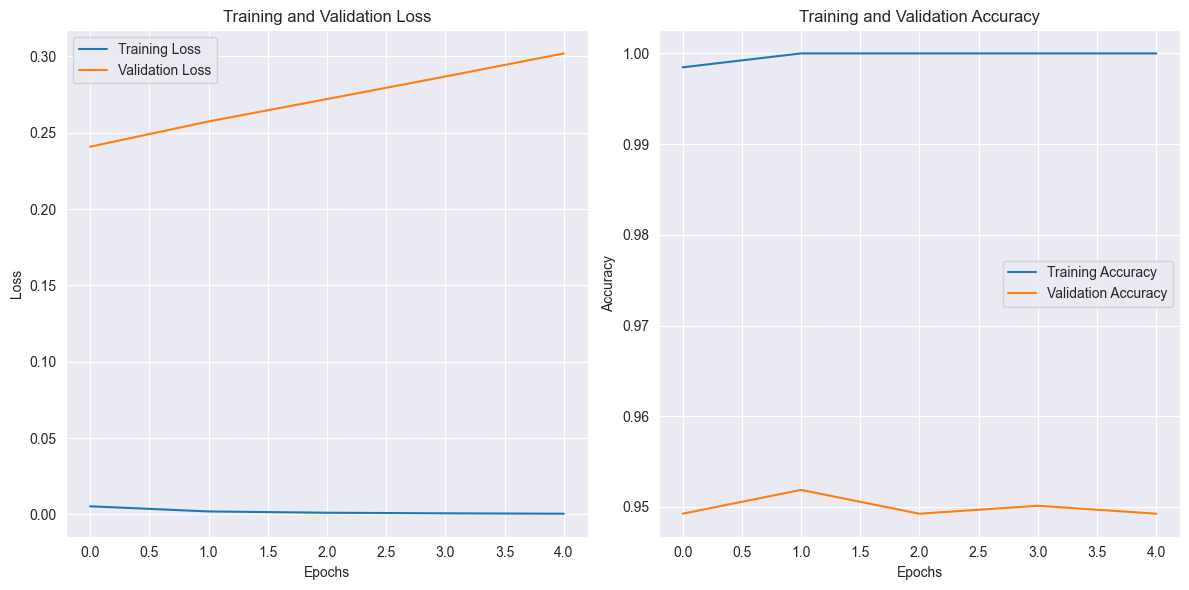

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot training history
def plot_training_history(history):
    # Plot training and validation loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Plot training history
plot_training_history(history)

In [14]:
train_score = model.evaluate(train_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

82/82 [==============================] - 7s 86ms/step - loss: 0.1955 - accuracy: 0.9619
Train Loss:  0.00034534320002421737
Train Accuracy:  1.0
--------------------
Validation Loss:  0.30195435881614685
Validation Accuracy:  0.9492563605308533
--------------------
Test Loss:  0.19545257091522217
Test Accuracy:  0.9618611931800842


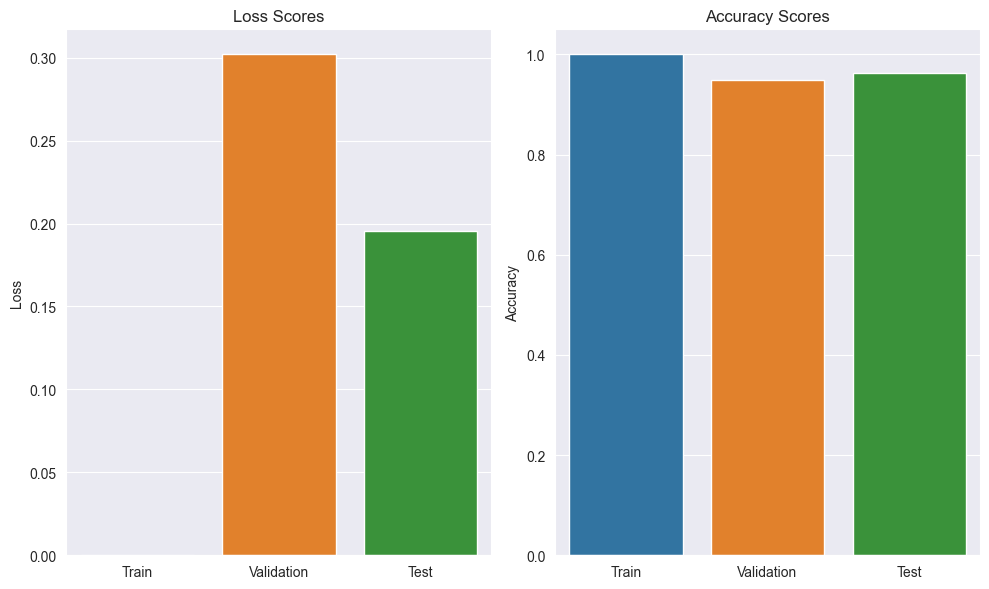

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
loss_values = [train_score[0], valid_score[0], test_score[0]]
accuracy_values = [train_score[1], valid_score[1], test_score[1]]
data_labels = ['Train', 'Validation', 'Test']

# Plot
plt.figure(figsize=(10, 6))

# Loss
plt.subplot(1, 2, 1)
sns.barplot(x=data_labels, y=loss_values)
plt.title('Loss Scores')
plt.ylabel('Loss')

# Accuracy
plt.subplot(1, 2, 2)
sns.barplot(x=data_labels, y=accuracy_values)
plt.title('Accuracy Scores')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [16]:
preds = model.predict_generator(test_gen)  # [0.00001, 95.12312, 0.0021, 3.12313]
y_pred = np.argmax(preds, axis=1)

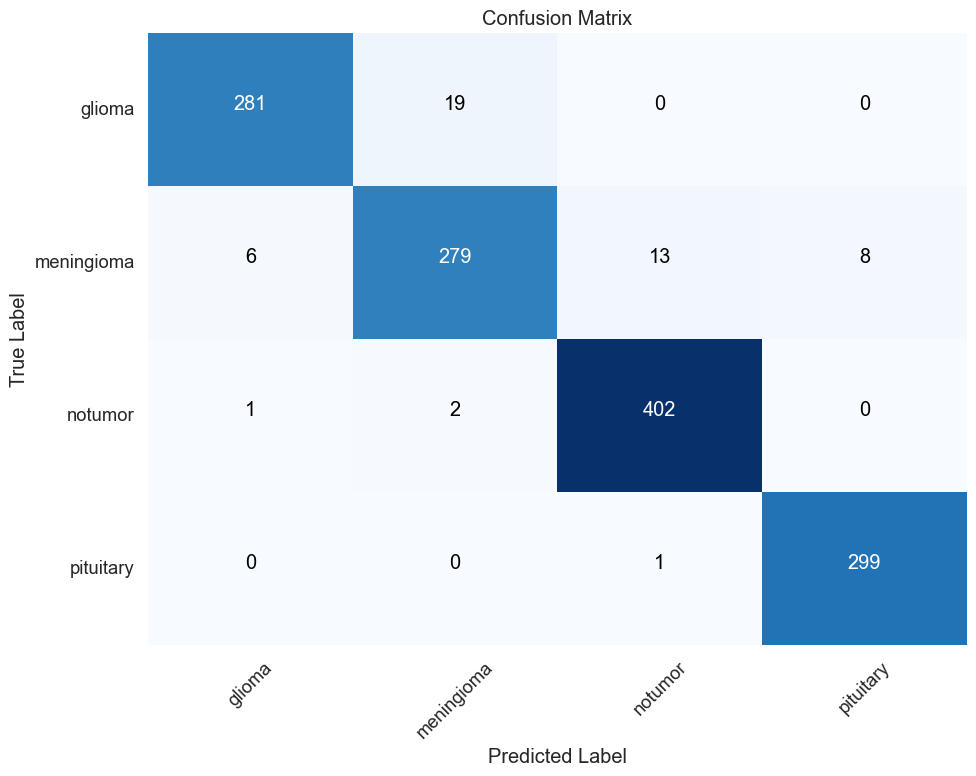

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Given data
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

# Plot
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Set font scale

# Create heatmap
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

# Add text annotations
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j + 0.5, i + 0.5, format(cm[i, j], 'd'),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.show()

In [18]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       0.98      0.94      0.96       300
  meningioma       0.93      0.91      0.92       306
     notumor       0.97      0.99      0.98       405
   pituitary       0.97      1.00      0.99       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311



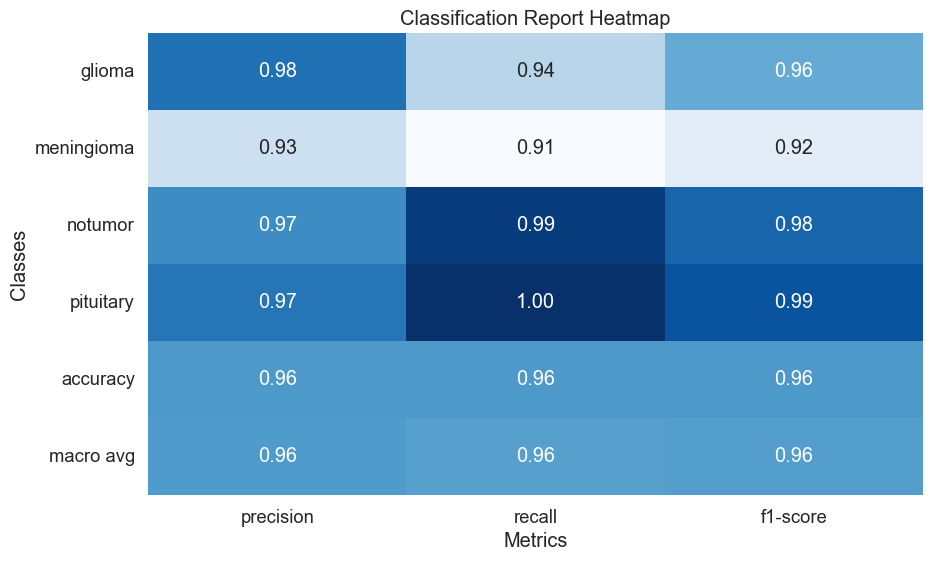

In [19]:
#Classification metrics as heatmap

from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Generate classification report
report = classification_report(test_gen.classes, y_pred, target_names=classes, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap="Blues", fmt=".2f", cbar=False)
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

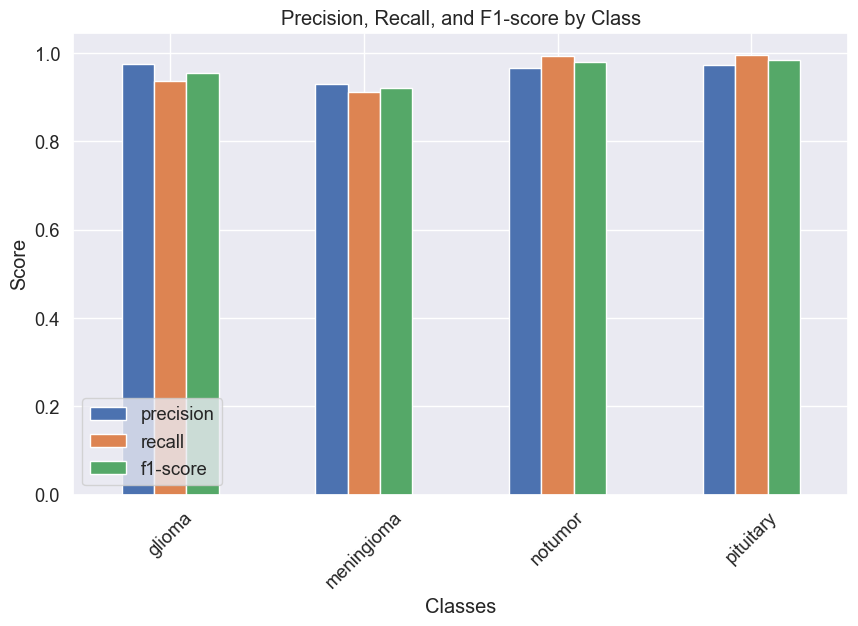

In [20]:
# Classification metrics barplot
# Plot as bar plots
report_df.iloc[:-3, :3].plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, and F1-score by Class')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower left')
plt.show()

# Saving the model

In [21]:
model.save('Brain Tumors.h5')
model_path = "C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/Brain Tumor MRI Dataset/Brain Tumors.h5"
print(f"Model Saved to: {model_path}")

Model Saved to: C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/Brain Tumor MRI Dataset/Brain Tumors.h5


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose
from tensorflow.keras.models import Model

def unet_model(input_size=(224, 224, 3)):
    inputs = Input(input_size)
    # Contracting Path
    c1 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    p2 = MaxPooling2D((2, 2))(c2)
    
    # Bottleneck
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    
    # Expansive Path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c2])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c1], axis=3)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c7)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Instantiate the model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
# Assuming you have a custom data generator for training and validation
# train_gen = CustomDataGenerator(train_data, batch_size=32)
# valid_gen = CustomDataGenerator(valid_data, batch_size=32)

history = model.fit(train_gen, validation_data=valid_gen, epochs=20)

In [ ]:
# Assuming test_gen is your test data generator
results = model.evaluate(test_gen)
print("Test loss, Test acc:", results)

# Visualizing predictions
for imgs, masks in test_gen:
    preds = model.predict(imgs)
    # Plot imgs, masks, and preds for visual comparison
    break

In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class CustomDataGenerator(Sequence):
    def __init__(self, image_paths, mask_paths, batch_size, img_size):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.batch_size = batch_size
        self.img_size = img_size

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def __getitem__(self, idx):
        batch_img_paths = self.image_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_mask_paths = self.mask_paths[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_imgs = np.zeros((self.batch_size, *self.img_size, 3), dtype=np.float32)
        batch_masks = np.zeros((self.batch_size, *self.img_size, 1), dtype=np.float32)

        for i, (img_path, mask_path) in enumerate(zip(batch_img_paths, batch_mask_paths)):
            img = load_img(img_path, target_size=self.img_size)
            img = img_to_array(img) / 255.0
            batch_imgs[i] = img

            mask = load_img(mask_path, target_size=self.img_size, color_mode="grayscale")
            mask = img_to_array(mask) / 255.0
            batch_masks[i] = mask

        return batch_imgs, batch_masks

In [ ]:
# Example usage
train_image_paths = ['C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/Brain Tumor MRI Dataset/Training/meningioma0/Tr-me_1213.jpg', 'C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/Brain Tumor MRI Dataset/Training/meningioma0/Tr-me_1214.jpg']
train_mask_paths = ['C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/Brain Tumor MRI Dataset/Training/meningioma/Tr-me_1213(mask).jpg', 'C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/Brain Tumor MRI Dataset/Training/meningioma0/Tr-me_1214(mask).jpg']

train_gen = CustomDataGenerator(train_image_paths, train_mask_paths, batch_size=32, img_size=(224, 224))

# Similarly, create validation and test generators


In [ ]:
model.predict()

# Segmentation Part

In [22]:
import os
import pandas as pd

def generate_dataset_dataframe(root_dir, mask_root_dir):
    categories = ['glioma', 'notumor', 'pituitary', 'meningioma']
    data = {'filepaths': [], 'maskpaths': []}

    for category in categories:
        img_dir = os.path.join(root_dir, category)
        mask_dir = os.path.join(mask_root_dir, category)
        
        for img_name in os.listdir(img_dir):
            img_path = os.path.join(img_dir, img_name)
            mask_path = os.path.join(mask_dir, img_name)  # Assuming direct correspondence
            
            data['filepaths'].append(img_path)
            data['maskpaths'].append(mask_path)
    
    return pd.DataFrame(data)

# Example usage
train_df = generate_dataset_dataframe('C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/Brain Tumor MRI Dataset/Training', 'C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/Masks/Training')
test_df = generate_dataset_dataframe('C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/Brain Tumor MRI Dataset/Testing', 'C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/Masks/Testing')

In [23]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os

def __generate_X_y(self, batch_df):
    X = np.empty((self.batch_size, *self.image_size, 3))
    y = np.empty((self.batch_size, *self.image_size, 1))  # Assuming binary masks
    for i, (img_path, mask_path) in enumerate(zip(batch_df['filepaths'], batch_df['maskpaths'])):
        if not os.path.exists(img_path):
            print(f"Image path does not exist: {img_path}")
            continue
        if not os.path.exists(mask_path):
            print(f"Mask path does not exist: {mask_path}")
            continue
        img = load_img(img_path, target_size=self.image_size)
        mask = load_img(mask_path, target_size=self.image_size, color_mode='grayscale')
        X[i,] = img_to_array(img) / 255.
        y[i,] = img_to_array(mask) / 255.
    return X, np.round(y)  # Round masks to 0 or 1

In [24]:
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

class ImageMaskGenerator(Sequence):
    def __init__(self, df, image_size, batch_size, mode='fit', shuffle=True):
        self.df = df
        self.image_size = image_size
        self.batch_size = batch_size
        self.mode = mode
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.df))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        batch_df = self.df.iloc[indexes]
        X, y = self.__generate_X_y(batch_df)
        return X, y

    def __generate_X_y(self, batch_df):
        X = np.empty((self.batch_size, *self.image_size, 3))
        y = np.empty((self.batch_size, *self.image_size, 1))  # Assuming binary masks
        for i, (img_path, mask_path) in enumerate(zip(batch_df['filepaths'], batch_df['maskpaths'])):
            img = load_img(img_path, target_size=self.image_size)
            mask = load_img(mask_path, target_size=self.image_size, color_mode='grayscale')
            X[i,] = img_to_array(img) / 255.
            y[i,] = img_to_array(mask) / 255.
        return X, np.round(y)  # Round masks to 0 or 1

# Example usage
image_size = (256, 256)
batch_size = 8
train_generator = ImageMaskGenerator(train_df, image_size, batch_size)

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def simple_unet_model(input_size=(256, 256, 3)):
    inputs = Input(input_size)
    
    # Downsample
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    p2 = MaxPooling2D((2, 2))(c2)
    
    # Bottleneck
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    
    # Upsample
    u4 = UpSampling2D((2, 2))(c3)
    u4 = concatenate([u4, c2])
    c4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u4)
    
    u5 = UpSampling2D((2, 2))(c4)
    u5 = concatenate([u5, c1], axis=3)
    c5 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u5)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

model = simple_unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 128, 128, 16  0          ['conv2d_16[0][0]']              
                                )                                                             

In [27]:
# Train the model
model.fit(train_generator, epochs=10)

Epoch 1/10
714/714 [==============================] - 35s 46ms/step - loss: 0.0624 - accuracy: 0.9783
Epoch 2/10
714/714 [==============================] - 32s 45ms/step - loss: 0.0192 - accuracy: 0.9921
Epoch 3/10
714/714 [==============================] - 32s 45ms/step - loss: 0.0138 - accuracy: 0.9944
Epoch 4/10
714/714 [==============================] - 32s 45ms/step - loss: 0.0122 - accuracy: 0.9950
Epoch 5/10
714/714 [==============================] - 33s 46ms/step - loss: 0.0103 - accuracy: 0.9960
Epoch 6/10
714/714 [==============================] - 34s 48ms/step - loss: 0.0081 - accuracy: 0.9969
Epoch 7/10
714/714 [==============================] - 32s 45ms/step - loss: 0.0078 - accuracy: 0.9970
Epoch 8/10
714/714 [==============================] - 33s 46ms/step - loss: 0.0060 - accuracy: 0.9978
Epoch 9/10
714/714 [==============================] - 34s 48ms/step - loss: 0.0076 - accuracy: 0.9972
Epoch 10/10
714/714 [==============================] - 35s 50ms/step - loss: 0.005

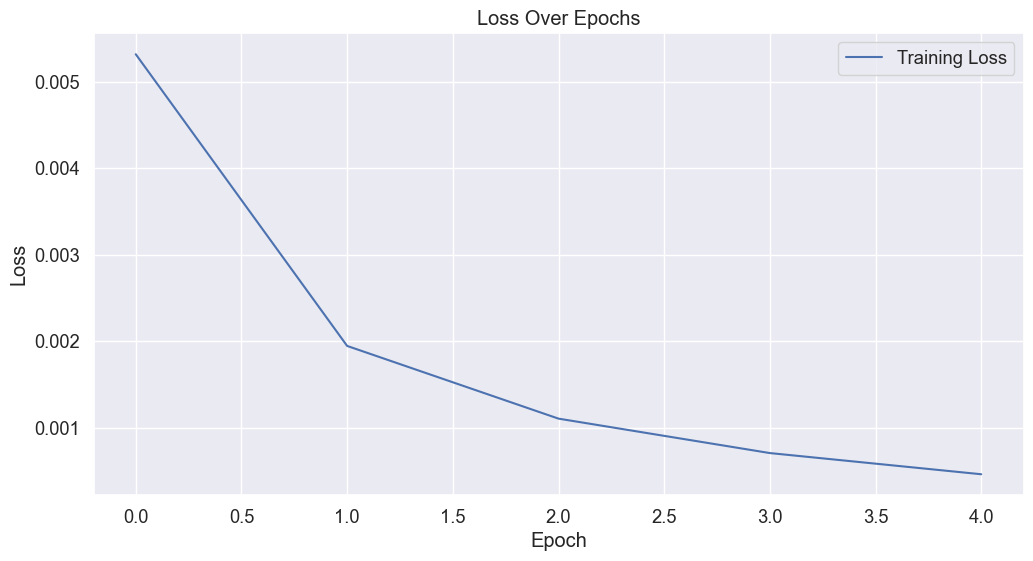

In [28]:
# Plot the training loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

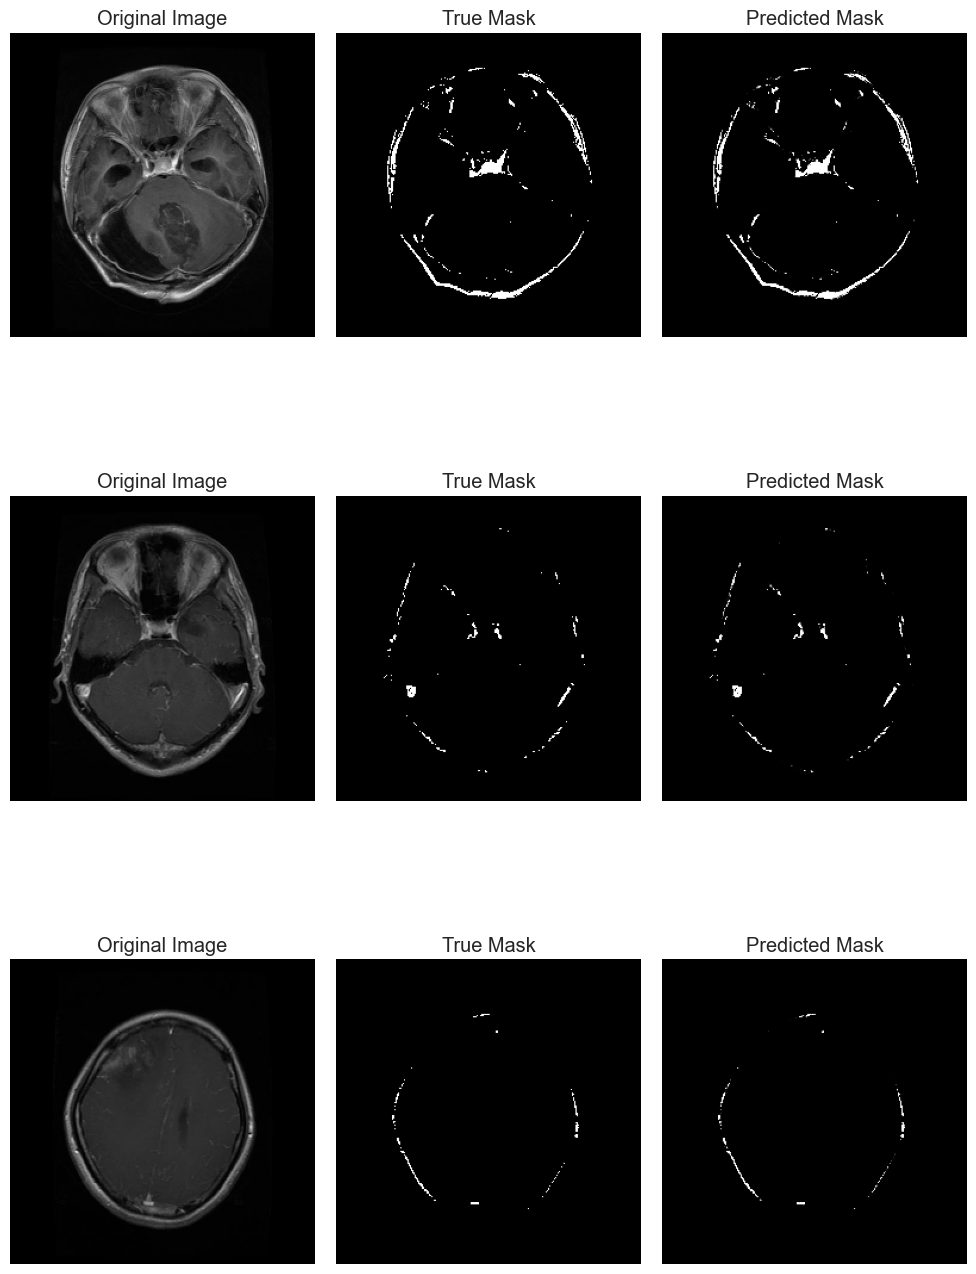

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a test generator similar to your train generator
test_generator = ImageMaskGenerator(test_df, image_size, batch_size, mode='predict', shuffle=False)

# Fetch a batch of images and their true masks from the test set
# Directly using __getitem__() to fetch the first batch
test_images, test_true_masks = test_generator.__getitem__(0)

# Predict masks with the model
test_pred_masks = model.predict(test_images)

# Number of images to display, ensuring it does not exceed the batch size
n_images = min(3, batch_size)

plt.figure(figsize=(10, 5 * n_images))

for i in range(n_images):
    plt.subplot(n_images, 3, i * 3 + 1)
    plt.imshow(test_images[i])
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(n_images, 3, i * 3 + 2)
    plt.imshow(test_true_masks[i].squeeze(), cmap='gray')  # Assuming binary masks
    plt.title("True Mask")
    plt.axis('off')
    
    plt.subplot(n_images, 3, i * 3 + 3)
    plt.imshow(test_pred_masks[i].squeeze(), cmap='gray')  # Assuming binary masks
    plt.title("Predicted Mask")
    plt.axis('off')

plt.tight_layout()
plt.show()

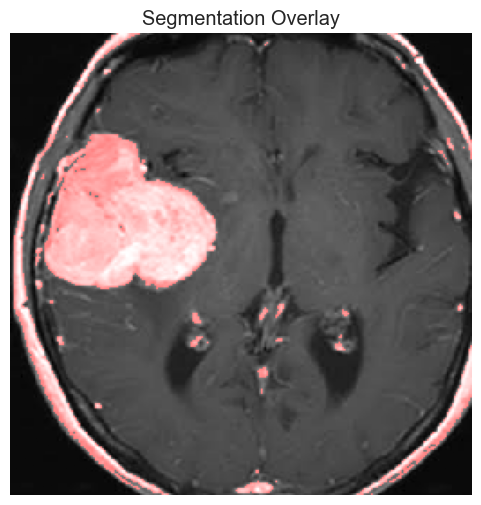

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load the image
# Testing/meningioma/Te-me_0025.jpg
image_path = 'C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/Brain Tumor MRI Dataset/Testing/meningioma/Te-me_0025.jpg'
original_image = load_img(image_path, target_size=image_size)
image_array = img_to_array(original_image) / 255.0

# Predict the mask (assuming your model is named 'model')
predicted_mask = model.predict(np.expand_dims(image_array, axis=0))

# Apply a threshold to get a binary mask
threshold = 0.5
binary_mask = predicted_mask[0] > threshold

# Create an overlay (this is just one way to do it, there are many!)
overlay = np.zeros_like(image_array)
overlay[..., 0] = binary_mask.squeeze()  # Red channel
overlay[..., 1] = binary_mask.squeeze() * 0  # Green channel
overlay[..., 2] = binary_mask.squeeze() * 0  # Blue channel

# Combine original image and overlay
combined_image = np.clip(image_array + overlay, 0, 1)

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(combined_image)
plt.title('Segmentation Overlay')
plt.axis('off')
plt.show()

In [31]:
def create_overlay(original_image, predicted_mask, threshold=0.5):
    binary_mask = predicted_mask > threshold
    overlay = np.zeros_like(original_image)
    overlay[..., 0] = binary_mask.squeeze()  # Red channel for the mask
    combined_image = np.clip(original_image + overlay, 0, 1)
    return combined_image

In [32]:
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define your image size and directories
image_size = (256, 256)  # Replace with the size your model expects
root_dir = 'C:/Users/Hafiz Ibtisam/Downloads/Fayzan Work/Brain Tumor MRI Dataset/Testing'  # or 'Training' when needed

# Iterate over each category
for category in ['glioma', 'notumor', 'pituitary', 'meningioma']:
    category_dir = os.path.join(root_dir, category)
    save_dir = os.path.join('Segmentation_Results', category)  # Directory to save overlay images
    os.makedirs(save_dir, exist_ok=True)
    
    # Iterate over each image in the category
    for image_name in os.listdir(category_dir):
        image_path = os.path.join(category_dir, image_name)
        original_image = load_img(image_path, target_size=image_size)
        image_array = img_to_array(original_image) / 255.0
        
        # Predict the mask
        predicted_mask = model.predict(np.expand_dims(image_array, axis=0))[0]
        
        # Create the overlay
        combined_image = create_overlay(image_array, predicted_mask)
        
        # Save the overlay image
        save_path = os.path.join(save_dir, image_name)
        plt.imsave(save_path, combined_image)